# Vectorization and Level Operations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

# Preliminaries

Before we begin the lab, let's review how to import packages in Python and introduce the ones you will be using.

Python has multiple ways to import packages to use in the notebook. The keywords you can use are **import**, **from**, and **as**. Run the following cell by clicking "Run" or using `shift + enter`.


In [1]:
import math
print(math.pi)

from math import pi
print(pi)

from math import pi as taco
print(taco)

from math import * #Import everything from the package
print(e)

3.141592653589793
3.141592653589793
3.141592653589793
2.718281828459045


The two main packages we will use in this and future labs are called Numpy and Matplotlib. These are the "Numerical Python" and "Matrix Plotting Library" packages respectively. These two libraries provide tons of functionality related to matrix processing and image input and output.

The conventional import method for these two packages looks like this:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now we can reference these two packages simply as "np" and "plt". If either of these packages aren't importing, make sure to quit your jupyter notebook and run `pip install numpy` or `pip install matplotlib` in your terminal.

Let's look at Numpy first. Numpy allows you store matrices natively and do matrix operations in a single step.

Let's look at a simple matrix.

In [3]:
import numpy as np
a = np.matrix([[1, 2],[3,4]])

print(a)

[[1 2]
 [3 4]]


In [4]:
print(a[0,1]) #Row, Column zero-based indexing

2


In [5]:
print(a[:,1]) #Grab all rows and the second column
print()
print(a[0,:]) #Grab everything in the first row

[[2]
 [4]]

[[1 2]]


In [6]:
print(np.multiply(a,a)) #Element-wise multiply
print()
print(np.matmul(a,a)) #True matrix multiply

[[ 1  4]
 [ 9 16]]

[[ 7 10]
 [15 22]]


There are plenty of Numpy operations that we are not covering, but we will see more of these as we go throughout the class. For more details, go to https://docs.scipy.org/doc/numpy/reference/. Also, make sure to check out the Useful Numpy Commands page on Canvas.

Now let's look at how we can import and display images with Matplotlib.

Importing is easy. All we need to do is use the `imread()` function.

In [7]:
import matplotlib.pyplot as plt

geese = plt.imread('geese.jpg')

print(geese.shape)

(256, 256, 3)


Grabbing the `.shape` property shows us that we have loaded an images that is 256 rows by 256 columns and has 3 color channels. Let's look at what that picture looks like. We use the `imshow()` and `show()` functions to do so.

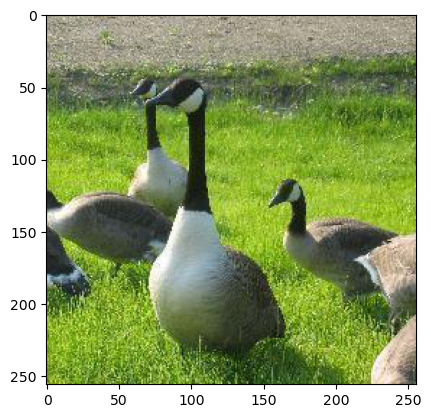

In [8]:
plt.imshow(geese)
plt.show()

Now we can see the picture, but why do we need to use two seperate commands to display? Because you may choose to modify the display properties before you show it. For example, maybe you want to add a title.

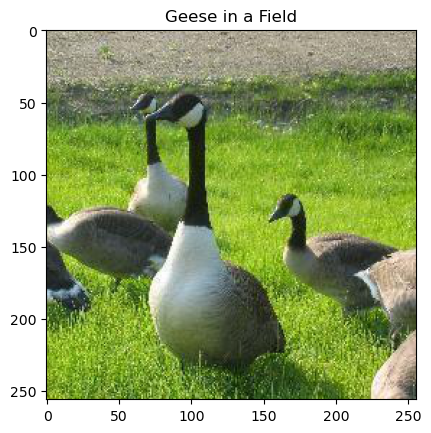

In [9]:
plt.imshow(geese) # This loads the image into the buffer
plt.title("Geese in a Field") # This modifies the plotting properties
plt.show() # This outputs the final displayed image

There is also a `plt.imsave()` function you can use to save images to your harddrive.

And with that, you now have the basic tools you need to work with images. For this lab, we will only use grayscale operations to simplify our practice of level operations. The test cases will be provided for each part of the lab, but you can also use the following code to load and plot grayscale images:

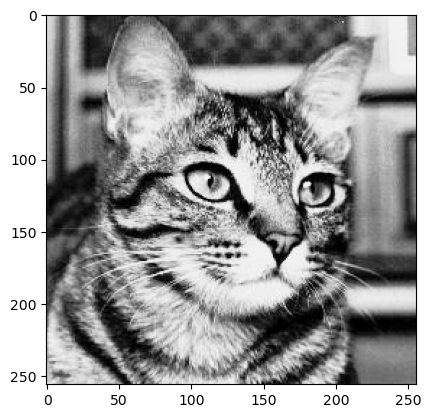

In [10]:
import matplotlib.pyplot as plt
import numpy as np

cat = plt.imread('cat.jpg')
cat = np.matrix(cat,dtype=np.int32)
plt.imshow(cat,cmap="Greys_r", vmin=0)
plt.show()

# Programming Exercises

**The purpose of this lab is to learn how to use the vectorization features of Numpy. You are not allowed to use a for or while loop for any part of this lab. Any use of a for or while loop will cost points.**

Implement each of the following level operations as Python functions.

## Function 1: Brightness Adjust
Takes in a grayscale image and returns the brightened version of that image according to a passed in parameter. Use a max image value of 255.

In [35]:

import numpy as np

def brightAdjust(image, c):
    return np.clip(image +c, 0, 255)




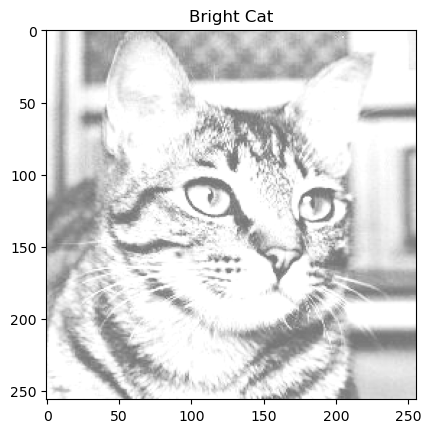

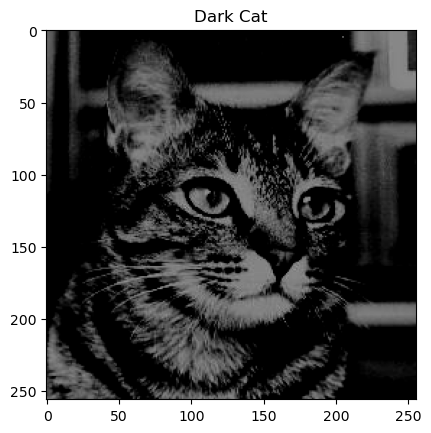

In [36]:
#Test Cases
bright_cat = brightAdjust(cat, 100)
plt.imshow(bright_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Bright Cat");plt.show()
dark_cat = brightAdjust(cat, -100)
plt.imshow(dark_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Dark Cat");plt.show()

## Function 2: Contrast Adjustment
Takes in a grayscale image and returns the contrasted version of that image according to a passed in parameter. Use a max image value of 255.

Also, rather than a straight linear operation, we will use a mapping similar to what Photoshop does. In particular, the contrast will be in the range [-100,100] where 0 denotes no change, -100 denotes complete loss of contrast, and 100 denotes maximum enhancement (8x multiplier). If *c* is the contrast parameter, then the level operation applied is:

$$s = \left(\frac{c+100}{100}\right)^4 (r-128) + 128$$

Make sure you work in floating point, not integers. Integer division would not be very acurate.

In [38]:
import numpy as np

def contrastAdjust(image,c):
    factor = ((c + 100) / 100) ** 4

    contrast = factor * (image - 128) + 128

    return np.clip(contrast, 0, 255)



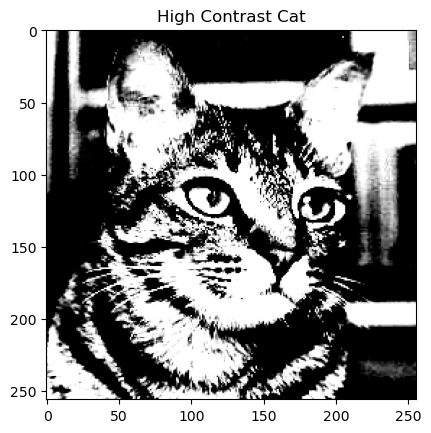

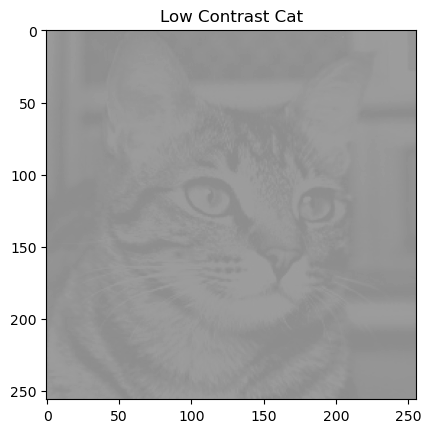

In [39]:
#Test Cases
high_contrast_cat = contrastAdjust(cat, 50)
plt.imshow(high_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("High Contrast Cat");plt.show()
low_contrast_cat = contrastAdjust(cat, -50)
plt.imshow(low_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Low Contrast Cat");plt.show()

## Function 3: Thresholding
Takes in a grayscale image and returns the thresholded version of the image according to a passed in parameter. Every pixel that is higher than or equal to the parameter is 255, everything below is zero. (Hint: np.where may be helpful)

In [40]:
import numpy as np

def thresholder(image, c):
    return np.where(image > c, 255, 0)


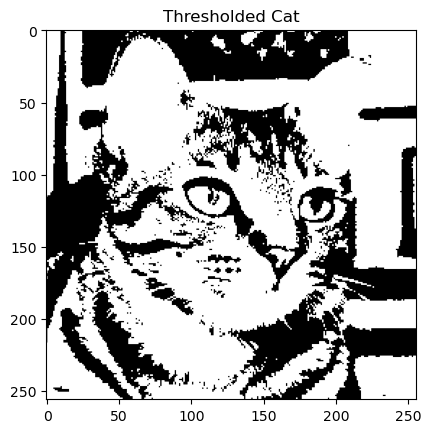

In [41]:
#Test Cases
thresholded_cat = thresholder(cat, 80)
plt.imshow(thresholded_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Thresholded Cat");plt.show()

## Function 4: Cropping
Takes in a grayscale image, an x and y of a topleft pixel, a width, and a height and returns a cropped version of that image according to those parameters. **Recall to use row-major indexing with numpy arrays and matrices, i.e. they are indexed image[row, column], which corresponds to image[y, x].  Points and Vectors use [x,y], however, so always check order.** 

In [42]:
import numpy as np

def cropper(image, width, height, x=0, y=0):
    return image[y:y + height, x:x + width]



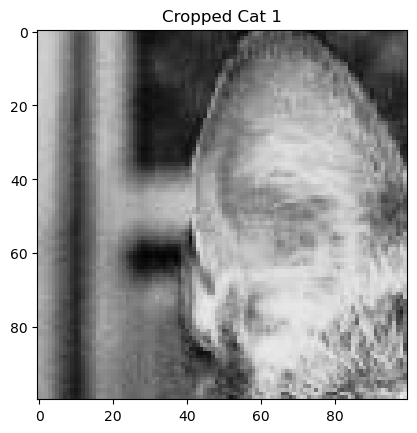

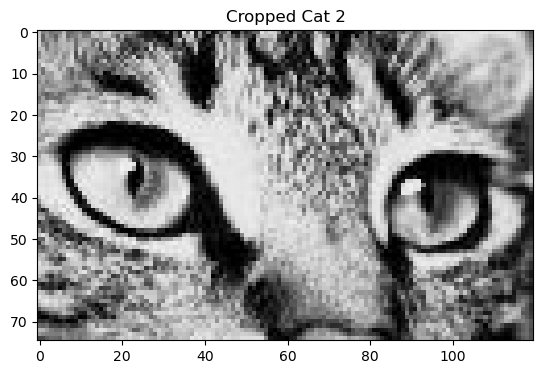

In [43]:
#Test Cases

#This should show just the ear of the cat
cropped_cat1 = cropper(cat, 100, 100)
plt.imshow(cropped_cat1, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 1");plt.show()
#This should show just the eyes of the cat
cropped_cat2 = cropper(cat, 120, 75, 90, 80)
plt.imshow(cropped_cat2, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 2");plt.show()

## Function 5: Mirror
Takes in a grayscale image and returns the same image mirrored about the y-axis. (Note: This is possible just using slice notation)

In [44]:
import numpy as np

def mirror(image):
    return image[:, ::-1]



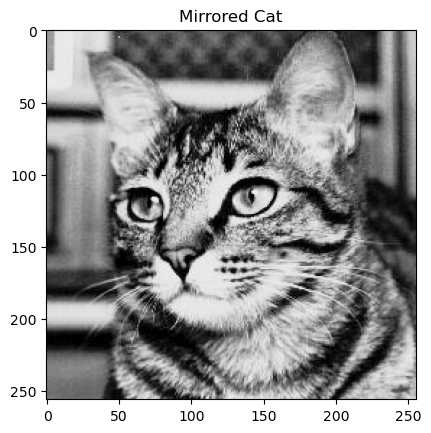

In [45]:
#Test Case
mirrored_cat = mirror(cat)
plt.imshow(mirrored_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Mirrored Cat");plt.show()